In [ ]:
#Going to make all my graphs pretty once analysis is completed

# Capstone EDA
## Questions:
* What does generation look like over time?
* What types of generation/fuel type are growing/shrinking?
* When did these changes occur?

In [2]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
#bring in data
df1 = pd.read_csv('seds_all_states_long.csv')
#sort on state
df1 = df1.sort_values(['state'])
#drop 0 columns because this dataframe will be used as the master for total generation, so zeros will get summed out
#group by year and state, so we can see everything in chronological order
df1 = df1[df1.value != 0].groupby(['year','state']).sum()
df1.index.names = ['year','state']
df1.columns = ['sumgen']

#make some copies that we can play around with and graph for meaning
copy1 = df1.copy()
copy2 = df1.copy()




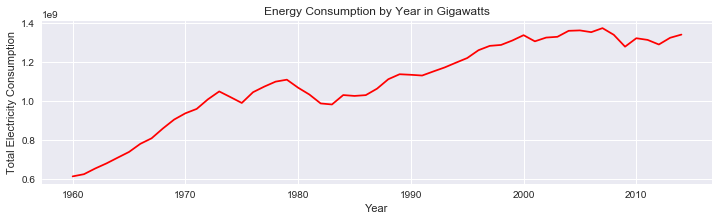

In [4]:
yearly_cons = df1.reset_index()
yearly_cons.head()
yearly_cons=yearly_cons.groupby('year').sum()

fig, axes = plt.subplots(figsize = (12,3))

axes.plot(yearly_cons, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Total Electricity Consumption')
axes.set_title('Energy Consumption by Year in Gigawatts');
plt.show()


In [5]:
#Get yearly consumption by state, and pair that with total consumption for the year
yearly_cons = yearly_cons.reset_index()
copy2 = copy2.reset_index()

percentage_copy = copy2.merge(yearly_cons, how = 'outer', on = ['year'])


In [6]:
#make a new row that shows what percent of generation the given state was during every year
percentage_copy['Percent of Yearly Consumption'] = 100*percentage_copy['sumgen_x']/percentage_copy['sumgen_y']

In [7]:
#Unsurprisingly California, Texas, New York, and Pennsylvania use a lot of energy

In [8]:
sorted_states = percentage_copy.sort_values(['year','Percent of Yearly Consumption','year'])

In [10]:
#break up generation by state and by year. This will allow us to make area graphs showing not
#only the change in consumption over time, but which states grew and and at what rate.
tot_gen_by_st = df1.unstack('state')

tot_gen_by_st.columns= tot_gen_by_st.columns.droplevel(0)


tot_gen_by_st.head()
tot_gen_by_st.to_csv('by_st_gen')

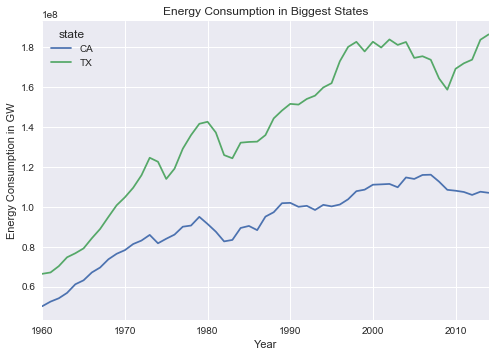

In [11]:
states = tot_gen_by_st
states.plot(y = ['CA','TX'])
plt.xlabel('Year')
plt.ylabel('Energy Consumption in GW')
plt.title('Energy Consumption in Biggest States')
plt.show()

## The first dataframe makes it easy to see how states contribute to the mix over a longer time frame, but the second one will give us a nice breakdown of generation type/fuel type, which is more what we're interested in. Eventually I'll go back in Bokeh or something and make it more interactive.

In [12]:
df2 = pd.read_excel('annual_generation_state.xls', skiprows = 1)


In [13]:
df2.columns = ['year','state','type','input_type','gen_by_type']
df2.head()

,year,state,type,input_type,gen_by_type
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0


In [14]:
totals_type = df2.groupby(['year','type']).sum()
totals_type = totals_type.unstack('type')



In [19]:
totals_type.reset_index(0, col_level= 0)
totals_type.to_csv('type_gen')

In [17]:
totals_type.columns= totals_type.columns.droplevel(0)


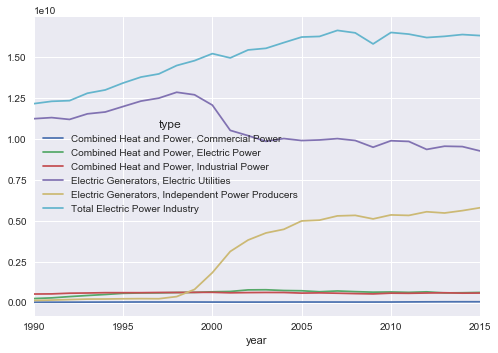

In [18]:
totals_type.plot()
#probably gonna make this a log graph

In [58]:
df_totals_input = df2.groupby(['year','input_type']).sum()

df_totals_input = df_totals_input.reset_index()
df_totals_input.columns = [c[-1] for c in df_totals_input.columns]





In [59]:
df_totals_input.columns = ['year','input_type','gen_amt']
df_totals_input.set_index(['year'])


df_totals_input = df_totals_input.pivot(index='year', columns='input_type', values='gen_amt')
df_totals_input.to_csv('input_type')

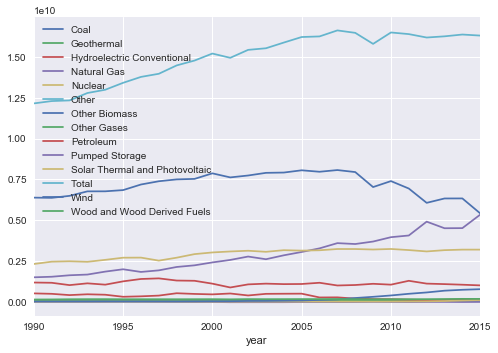

In [60]:
df_totals_input.plot()
plt.legend()

In [61]:
df_lean = pd.read_csv('party_aff.csv')
df_lean.head()

,State,Republican/lean Rep.,No lean,Democrat/lean Dem.,Sample Size
0,Alabama,52%,13%,35%,511
1,Alaska,39%,29%,32%,310
2,Arizona,40%,21%,39%,653
3,Arkansas,46%,16%,38%,311
4,California,30%,21%,49%,"3,697"


In [56]:
df_lean.columns = ['state', 'rep','no_lean', 'dem', 'samp_size']

In [57]:
df_lean.head()

,state,rep,no_lean,dem,samp_size
0,Alabama,52%,13%,35%,511
1,Alaska,39%,29%,32%,310
2,Arizona,40%,21%,39%,653
3,Arkansas,46%,16%,38%,311
4,California,30%,21%,49%,"3,697"


In [53]:
#was considering making a table of states and their party affiliations
#running a difference and seeing if statistically significant to determine
#a state's party affiliation, then labelling them,
#regressing with republican or democrat as a dummy variable, and reporting findings,
#but I think that may be something I do after completing this program
#as my project already has three mini projects within, and with these outcomes, plenty of analysis

TypeError: tuple indices must be integers, not str